<img src="https://www.e4ds.com/news_photo/U77C53G6CP8ASEHUJ5B7.png">

In [10]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torch.optim import Adam

import torchvision
import torchvision.transforms.v2 as transforms
import torchvision.transforms.functional as F 
import matplotlib.pyplot as plt 

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [2]:
train_set = torchvision.datasets.MNIST("./data", train = True, download = True)
test_set = torchvision.datasets.MNIST("./data", train = False, download = True)

100%|██████████| 9.91M/9.91M [00:02<00:00, 4.80MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 157kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 1.65MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 2.26MB/s]


In [ ]:
print(type(train_set)) # torchvision의 dataset

<class 'torchvision.datasets.mnist.MNIST'>


In [6]:
x_0, y_0 = train_set[0]
x_0

In [8]:
print(type(x_0))

<class 'PIL.Image.Image'>


In [ ]:
y_0, type(y_0) # image에 대한 정답 label

(5, int)

In [11]:
trans = transforms.Compose([
  transforms.ToTensor() # PyTorch의 tensor로 데이터 변환 
])
x_0_tensor = trans(x_0)

c:\Users\user\anaconda3\envs\torchenv\lib\site-packages\torchvision\transforms\v2\_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


In [12]:
x_0_tensor

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [14]:
# PIL Image은 0 ~ 1 사이의 값으로 구성되어있음
x_0_tensor.max(), x_0_tensor.min()

(tensor(1.), tensor(0.))

In [15]:
x_0_tensor.size(), x_0_tensor.shape

(torch.Size([1, 28, 28]), torch.Size([1, 28, 28]))

### Transforms torch.tensor to PIL Image

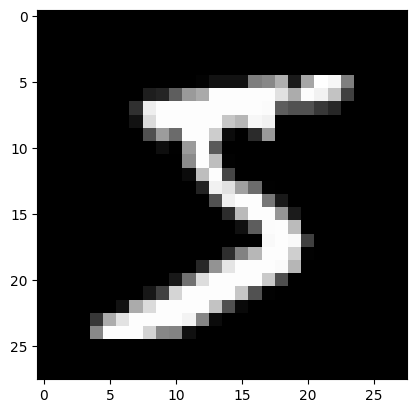

In [16]:
image = F.to_pil_image(x_0_tensor)
plt.imshow(image, cmap = 'gray')

In [17]:
train_set.transform = trans
test_set.transform = trans

In [18]:
batch_size = 32

train_loader = DataLoader(train_set, batch_size = batch_size, shuffle = True, drop_last = True)
test_loader = DataLoader(test_set, batch_size = batch_size)

In [19]:
x, y = next(iter(train_loader))
x, y

(tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         ...,
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ..

In [22]:
# y의 shape를 보면 한 배치당 32개의 데이터가 존재하므로, label 데이터도 32개가 존재한다는 뜻
x.shape, y.shape 

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [ ]:
len(train_loader) 

1875

In [23]:
test_matrix = torch.tensor(
    [[1, 2, 3],
     [4, 5, 6],
     [7, 8, 9]]
)
test_matrix

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [ ]:
# 임의로 배치 데이터 생성 
batch_test_matrix = test_matrix[None, :]
batch_test_matrix.shape

torch.Size([1, 3, 3])

In [27]:
batch_test_matrix_flatten = nn.Flatten()(batch_test_matrix)
batch_test_matrix_flatten, batch_test_matrix_flatten.size()

(tensor([[1, 2, 3, 4, 5, 6, 7, 8, 9]]), torch.Size([1, 9]))

### Compiling the Model

In [30]:
input_size = 1 * 28 * 28
n_classes = 10

layers = [
  nn.Flatten(),
  nn.Linear(input_size, 512), # 1st hidden 
  nn.ReLU(),
  nn.Linear(512, 512), # 2nd hidden 
  nn.ReLU(),
  nn.Linear(512, n_classes) # Output layer
]

layers

[Flatten(start_dim=1, end_dim=-1),
 Linear(in_features=784, out_features=512, bias=True),
 ReLU(),
 Linear(in_features=512, out_features=512, bias=True),
 ReLU(),
 Linear(in_features=512, out_features=10, bias=True)]

In [42]:
model = nn.Sequential(*layers)
model

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=512, bias=True)
  (2): ReLU()
  (3): Linear(in_features=512, out_features=512, bias=True)
  (4): ReLU()
  (5): Linear(in_features=512, out_features=10, bias=True)
)

In [43]:
model.to(device)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=512, bias=True)
  (2): ReLU()
  (3): Linear(in_features=512, out_features=512, bias=True)
  (4): ReLU()
  (5): Linear(in_features=512, out_features=10, bias=True)
)

In [ ]:
#model = torch.compile(model)

### loss_function & optimizer

In [44]:
loss_function = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters())

In [45]:
train_N = len(train_loader.dataset)
test_N = len(test_loader.dataset)

In [46]:
train_N, test_N

(60000, 10000)

### Accuracy function

In [47]:
def get_batch_accuracy(output, y, N):
    pred = output.argmax(dim=1, keepdim=True)
    correct = pred.eq(y.view_as(pred)).sum().item()
    return correct / N

### Train function

In [48]:
def train():
    loss = 0
    accuracy = 0

    model.train()
    for x, y in train_loader:
        x, y = x.to(device), y.to(device)
        output = model(x)
        optimizer.zero_grad() # zero_grad()를 하지 않으면 Gradient를 누적해서 이전 Gradient 값의 영향을 받을 수 있음
        batch_loss = loss_function(output, y)
        batch_loss.backward()
        optimizer.step()

        loss += batch_loss.item()
        accuracy += get_batch_accuracy(output, y, train_N)
    print('Train - Loss: {:.4f} Accuracy: {:.4f}'.format(loss, accuracy))

### Validate function

In [49]:
def validate():
    loss = 0
    accuracy = 0

    model.eval()
    # 추론 과정에서 Gradient를 계산하지 않음
    with torch.no_grad():
        for x, y in test_loader:
            x, y = x.to(device), y.to(device)
            output = model(x)

            loss += loss_function(output, y).item()
            accuracy += get_batch_accuracy(output, y, test_N)
    print('Valid - Loss: {:.4f} Accuracy: {:.4f}'.format(loss, accuracy))

In [50]:
epochs = 5

for epoch in range(epochs):
    print('Epoch: {}'.format(epoch))
    train()
    validate()

Epoch: 0
Train - Loss: 378.4212 Accuracy: 0.9390
Valid - Loss: 31.6589 Accuracy: 0.9684
Epoch: 1
Train - Loss: 155.8088 Accuracy: 0.9743
Valid - Loss: 28.3194 Accuracy: 0.9714
Epoch: 2
Train - Loss: 109.7024 Accuracy: 0.9814
Valid - Loss: 22.2838 Accuracy: 0.9764
Epoch: 3
Train - Loss: 81.4296 Accuracy: 0.9867
Valid - Loss: 21.9571 Accuracy: 0.9791
Epoch: 4
Train - Loss: 65.1112 Accuracy: 0.9887
Valid - Loss: 25.9517 Accuracy: 0.9800


In [51]:
x_0_gpu = x_0_tensor.to(device)

prediction = model(x_0_gpu)
prediction

tensor([[-25.3267,  -3.2478, -14.7783,  10.6735, -30.5343,  17.4136, -17.0599,
         -15.8174, -11.7202,  -6.1829]], device='cuda:0',
       grad_fn=<AddmmBackward0>)

In [52]:
prediction.argmax(dim = 1, keepdim = True)

tensor([[5]], device='cuda:0')